In [ ]:
#Menginstall library Python namanya OpenDatasets
!pip install opendatasets

In [ ]:
#Untuk menginstall library Pandas di Python
!pip install pandas

In [ ]:
#Untuk menginstall Kaggle API Client
!pip install -q kaggle

In [2]:
#Untuk mengunggah file kaggle.json yang sudah di download dari kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noufalaji","key":"6722a957b9f591cf6a106f1b73647667"}'}

In [3]:
import os

# Membuat folder .kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Memindahkan file kaggle.json ke folder .kaggle
!mv kaggle.json /root/.kaggle/

# Mengatur izin untuk file kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Unduh dataset Amazon Fine Food Reviews
!kaggle datasets download -d snap/amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 97% 236M/242M [00:01<00:00, 184MB/s]
100% 242M/242M [00:01<00:00, 198MB/s]


In [5]:
import zipfile

# Ekstrak file ZIP
with zipfile.ZipFile('amazon-fine-food-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Lihat isi folder hasil ekstraksi
print(os.listdir('dataset'))

['database.sqlite', 'Reviews.csv', 'hashes.txt']


In [6]:
import pandas as pd
import os

# Path ke file CSV
# Make sure the filename matches the extracted file and the dataset folder exists
file_path = os.path.join('dataset', 'Reviews.csv')

# Membaca file CSV yang dibatasi jadi 250.000
df = pd.read_csv(file_path, nrows=300000)

# Menampilkan beberapa baris pertama
display(df.head())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      300000 non-null  int64 
 1   ProductId               300000 non-null  object
 2   UserId                  300000 non-null  object
 3   ProfileName             299985 non-null  object
 4   HelpfulnessNumerator    300000 non-null  int64 
 5   HelpfulnessDenominator  300000 non-null  int64 
 6   Score                   300000 non-null  int64 
 7   Time                    300000 non-null  int64 
 8   Summary                 299988 non-null  object
 9   Text                    300000 non-null  object
dtypes: int64(5), object(5)
memory usage: 22.9+ MB


In [8]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
display(df.isnull().sum())

,0
Id,0
ProductId,0
UserId,0
ProfileName,15
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,12
Text,0


## Mengisi Profile Name dengan fungsi Modus

In [12]:
# Menandai baris yang awalnya kosong
df['was_null'] = df['ProfileName'].isnull()

# Mengisi nilai kosong dengan modus tanpa 'inplace=True'
profile_mode = df['ProfileName'].mode()[0]
df['ProfileName'] = df['ProfileName'].fillna(profile_mode)

# Menampilkan baris yang sebelumnya kosong
updated_rows = df[df['was_null']]

# Menampilkan hasil
print(f"Jumlah baris yang diperbarui: {updated_rows.shape[0]}")
print(updated_rows[['ProfileName', 'was_null']])  # Hanya kolom yang relevan untuk dilihat

Jumlah baris yang diperbarui: 15
             ProfileName  was_null
10616   C. F. Hill "CFH"      True
25509   C. F. Hill "CFH"      True
38874   C. F. Hill "CFH"      True
47923   C. F. Hill "CFH"      True
49800   C. F. Hill "CFH"      True
67077   C. F. Hill "CFH"      True
106550  C. F. Hill "CFH"      True
121819  C. F. Hill "CFH"      True
125452  C. F. Hill "CFH"      True
137613  C. F. Hill "CFH"      True
163191  C. F. Hill "CFH"      True
172462  C. F. Hill "CFH"      True
211846  C. F. Hill "CFH"      True
268648  C. F. Hill "CFH"      True
297275  C. F. Hill "CFH"      True


In [13]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
display(df.isnull().sum())

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


# Mengisi Kolom Summary dengan sebagian Text

In [10]:
# Mengisi kolom 'Summary' dengan sebagian dari teks ulasan di kolom 'Text'
df['Summary'] = df['Text'].apply(lambda x: x[:50] if pd.notnull(x) else "No summary")

# Tampilkan hasil
display(df)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
299995,299996,B000VA5LZI,A26HE0NT48NQZA,S. Parent,0,0,3,1250208000,"The price was excellent for this product, howe...","The price was excellent for this product, howe..."
299996,299997,B000VA5LZI,AE6YV1KF6UKJR,Rhonda Davis,1,4,2,1197590400,not the best ... too many small pieces and no ...,not the best ... too many small pieces and no ...
299997,299998,B000VA5LZI,A3NRNASNTU5TFI,Lemmy,2,43,5,1194739200,"Dude! DUDE! Dude? Hey dude, wake up, man!<br /...","Dude! DUDE! Dude? Hey dude, wake up, man!<br /..."
299998,299999,B0007XAUXC,AYRFQU12QD60L,D. Rosselli,12,12,5,1111708800,I ordered and sent this item as a gift the Art...,I ordered and sent this item as a gift the Art...


In [14]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
display(df.isnull().sum())

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


# Standarisasi pada Kolom Score menggunakan StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi kolom 'Score'
df['score_standardized'] = scaler.fit_transform(df[['Score']])

# Menampilkan beberapa baris pertama setelah standarisasi
display(df[['Score', 'score_standardized']].head())

,Score,score_standardized
0,5,0.631038
1,1,-2.411711
2,4,-0.129649
3,2,-1.651024
4,5,0.631038


# Diagram Rating Produk berdasarkan Ulasan

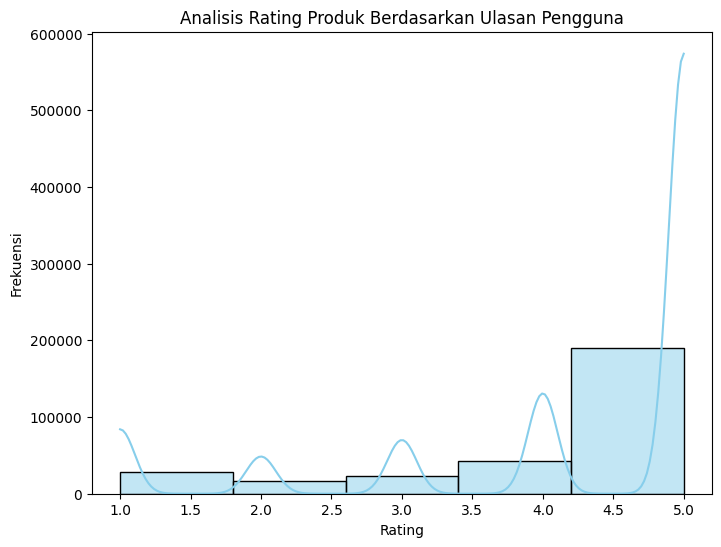

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi rating (score)
plt.figure(figsize=(8, 6))
sns.histplot(df['Score'], kde=True, bins=5, color='skyblue')
plt.title('Analisis Rating Produk Berdasarkan Ulasan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

# Diagram antara Rating dan Suara Helpfull

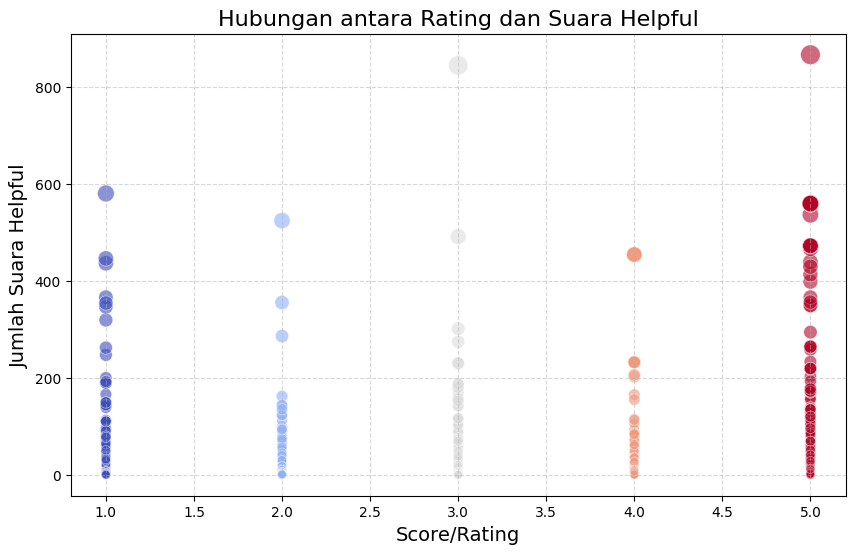

In [17]:
# Scatter plot antara rating dan jumlah suara helpful, dengan warna berdasarkan rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='HelpfulnessNumerator', data=df, hue='Score', palette='coolwarm', size='HelpfulnessNumerator', sizes=(40, 200), legend=False, alpha=0.6)
plt.title('Hubungan antara Rating dan Suara Helpful', fontsize=16)
plt.xlabel('Score/Rating', fontsize=14)
plt.ylabel('Jumlah Suara Helpful', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Diagram Korelasi Antara Kolom Numerik

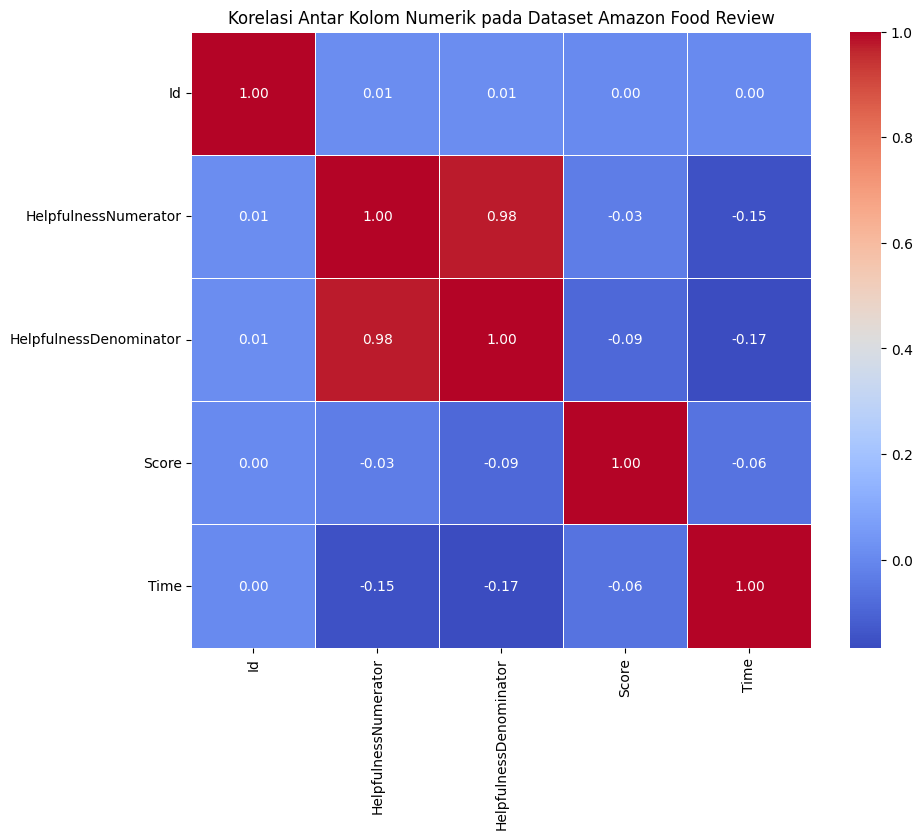

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik yang relevan
selected_columns = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
df_selected = df[selected_columns]

# Hitung matriks korelasi
correlation_matrix = df_selected.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Kolom Numerik pada Dataset Amazon Food Review')
plt.show()


## Mempersiapkan Data menggunakan PySpark

In [20]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F

# Inisialisasi Spark Session
spark = SparkSession.builder.appName('AmazonFoodReview').getOrCreate()

# Mengonversi DataFrame Pandas ke DataFrame Spark
spark_df = spark.createDataFrame(df)

# Menambahkan kolom panjang teks sebagai fitur tambahan
spark_df = spark_df.withColumn('reviewLength', F.length(spark_df['Text']))

# Menyiapkan fitur dan target menggunakan VectorAssembler
assembler = VectorAssembler(inputCols=['HelpfulnessNumerator', 'reviewLength'], outputCol='features')
df_transformed = assembler.transform(spark_df)

# Menampilkan kolom hasil transformasi
df_transformed.select('HelpfulnessNumerator', 'reviewLength', 'features').show(5)


+--------------------+------------+-----------+
|HelpfulnessNumerator|reviewLength|   features|
+--------------------+------------+-----------+
|                   1|         263|[1.0,263.0]|
|                   0|         190|[0.0,190.0]|
|                   1|         509|[1.0,509.0]|
|                   3|         219|[3.0,219.0]|
|                   0|         140|[0.0,140.0]|
+--------------------+------------+-----------+
only showing top 5 rows



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame and it has necessary columns like 'Score', 'HelpfulnessNumerator', 'Text'

# Create 'reviewLength' feature
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x)))

# Define features (X) and target (y)
X = df[['HelpfulnessNumerator', 'reviewLength']]
y = df['Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Now you can calculate the metrics
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = np.sqrt(mse)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE

# Avoiding division by zero for MAPE
if (y_test != 0).all():
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE (%)
else:
    mape = "Tidak bisa dihitung, karena terdapat y_test = 0."

# Print the results
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'MAPE (Mean Absolute Percentage Error): {mape}')

MAE (Mean Absolute Error): 0.9694401458538076
MSE (Mean Squared Error): 1.4807614895699575
RMSE (Root Mean Squared Error): 1.2168654360979925
MAPE (Mean Absolute Percentage Error): 42.115401163166744


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame and it has necessary columns like 'Score', 'HelpfulnessNumerator', 'Text'

# Create 'reviewLength' feature
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x)))

# Remove rows with missing values in relevant columns
df = df.dropna(subset=['Score', 'HelpfulnessNumerator', 'Text'])

# Subset for faster experimentation (optional)
df = df.sample(10000, random_state=42)

# Define features (X) and target (y)
X = df[['HelpfulnessNumerator', 'reviewLength']]
y = df['Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 if (y_test != 0).all() else "Cannot calculate MAPE"
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # You can tune alpha
    "Lasso Regression": Lasso(alpha=0.1)  # You can tune alpha
}

# Evaluate all models
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Print results
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...

Linear Regression Results:
MAE: 0.9694401458538076
MSE: 1.4807614895699575
RMSE: 1.2168654360979925
MAPE: 42.115401163166744

Ridge Regression Results:
MAE: 0.9694401446249585
MSE: 1.480761487630544
RMSE: 1.2168654353011035
MAPE: 42.11540111911017

Lasso Regression Results:
MAE: 0.9692478058937504
MSE: 1.4804876769457975
RMSE: 1.2167529235410932
MAPE: 42.1083848073341


# RMSE Menggunakan Linear Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

# Contoh preprocessing teks (menghitung panjang teks)
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x)))

# Fitur dan target
X = df[['HelpfulnessNumerator', 'reviewLength']]  # Fitur
y = df['Score']  # Target (Rating Produk)

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


RMSE: 1.2168654360979925


# RMSE Menggunakan Lasso Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Contoh preprocessing teks (menghitung panjang teks)
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x)))

# Fitur dan target
X = df[['HelpfulnessNumerator', 'reviewLength']]  # Fitur
y = df['Score']  # Target (Rating Produk)

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Lasso Regression
model = Lasso(alpha=1.0)  # Hyperparameter 'alpha' dapat disesuaikan
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


RMSE: 1.2167196152249475


# Memprediksi Rating Produk vs Nilai Asli

RMSE: 1.2167529235410932


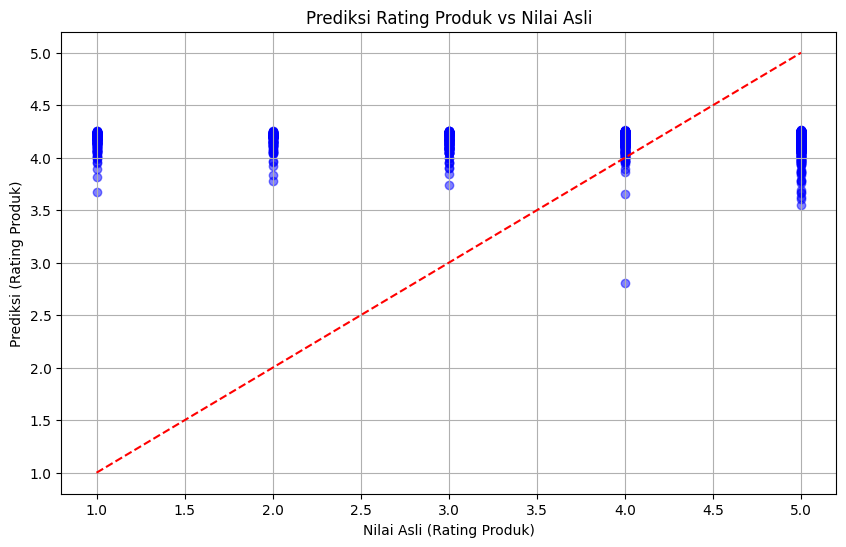

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Misalnya kita ingin memprediksi 'score' berdasarkan 'helpfulnessNumerator' dan 'reviewLength'
# Membuat fitur reviewLength (panjang teks)
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x)))

# Memilih fitur dan target
X = df[['HelpfulnessNumerator', 'reviewLength']]  # Fitur
y = df['Score']  # Target (Rating Produk)

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Lasso Regression (menggunakan alpha sebagai parameter regularisasi)
model = Lasso(alpha=0.1)  # alpha adalah parameter regularisasi
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Visualisasi Hasil Prediksi vs Nilai Asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Prediksi Rating Produk vs Nilai Asli')
plt.xlabel('Nilai Asli (Rating Produk)')
plt.ylabel('Prediksi (Rating Produk)')
plt.grid(True)

# Menambahkan garis diagonal (Prediksi = Nilai Asli)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.show()


# Prediksi Jumlah Suara  Helpful vs Nilai Asli

RMSE Prediksi Suara Helpful: 3.6190277164516216


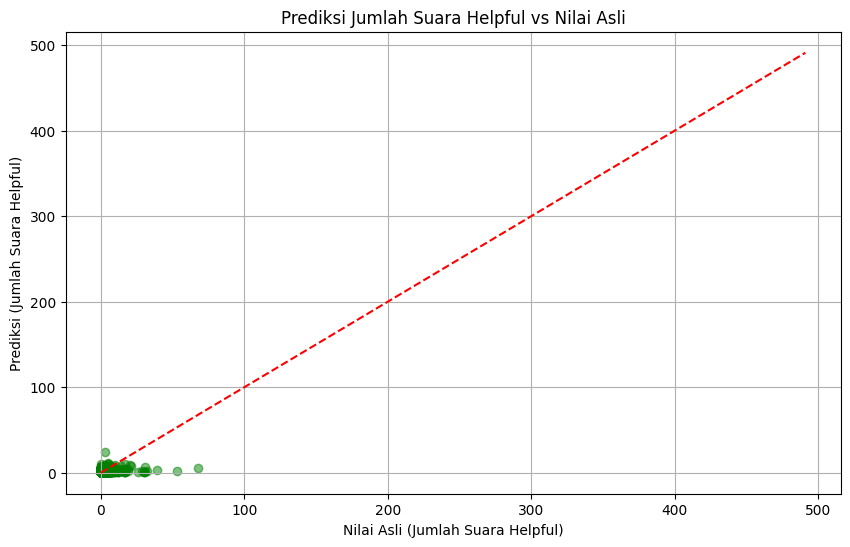

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso  # Ganti LinearRegression dengan Lasso
from sklearn.metrics import mean_squared_error

# Misalnya kita ingin memprediksi 'helpfulnessNumerator' berdasarkan 'score' dan 'reviewLength'
X_helpful = df[['Score', 'reviewLength']]  # Fitur
y_helpful = df['HelpfulnessNumerator']  # Target (Jumlah Suara Helpful)

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_helpful, y_helpful, test_size=0.2, random_state=42)

# Model Lasso Regression
model_helpful = Lasso(alpha=0.1)  # Anda dapat mengatur alpha sesuai kebutuhan
model_helpful.fit(X_train, y_train)

# Prediksi
y_pred_helpful = model_helpful.predict(X_test)

# Evaluasi
mse_helpful = mean_squared_error(y_test, y_pred_helpful)
rmse_helpful = np.sqrt(mse_helpful)
print(f'RMSE Prediksi Suara Helpful: {rmse_helpful}')

# Visualisasi Prediksi vs Nilai Asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_helpful, alpha=0.5, color='green')
plt.title('Prediksi Jumlah Suara Helpful vs Nilai Asli')
plt.xlabel('Nilai Asli (Jumlah Suara Helpful)')
plt.ylabel('Prediksi (Jumlah Suara Helpful)')
plt.grid(True)

# Menambahkan garis diagonal
plt.plot([y_helpful.min(), y_helpful.max()], [y_helpful.min(), y_helpful.max()], color='red', linestyle='--')

plt.show()

Alpha: 0.01, RMSE: 3.6207907716647982


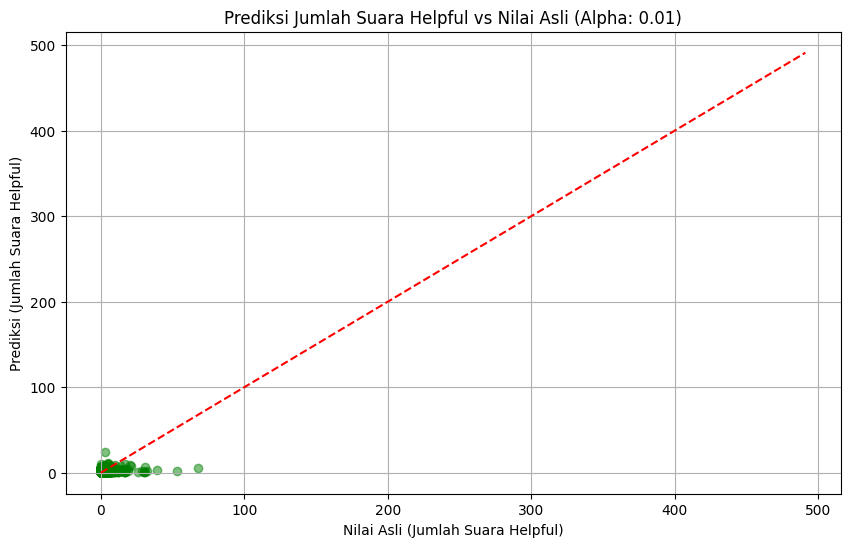

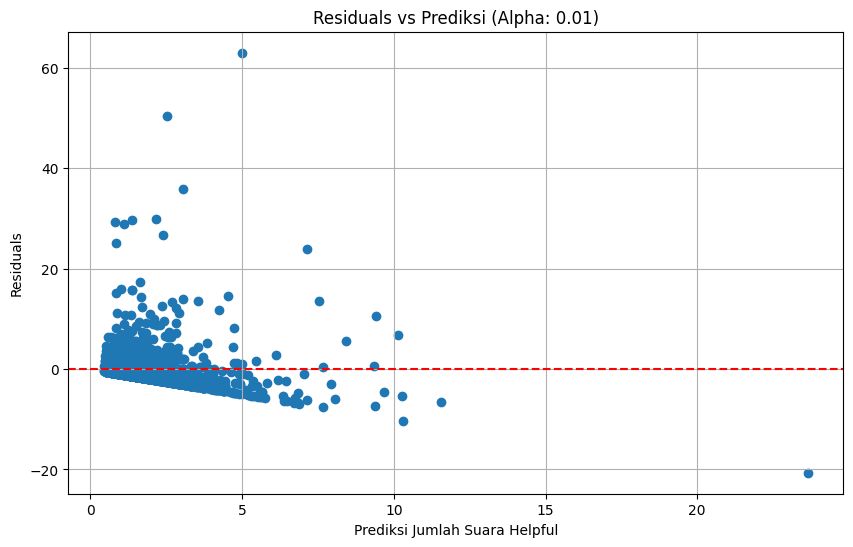

Alpha: 0.1, RMSE: 3.6045584687511174


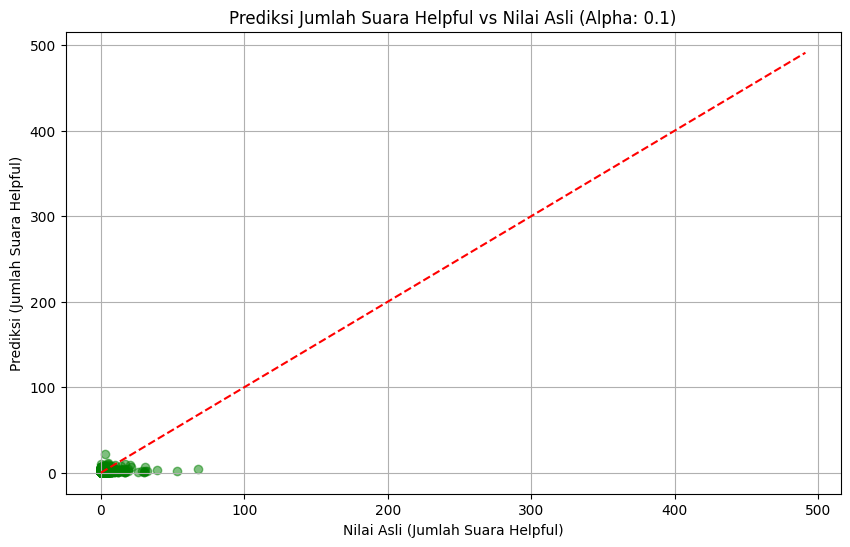

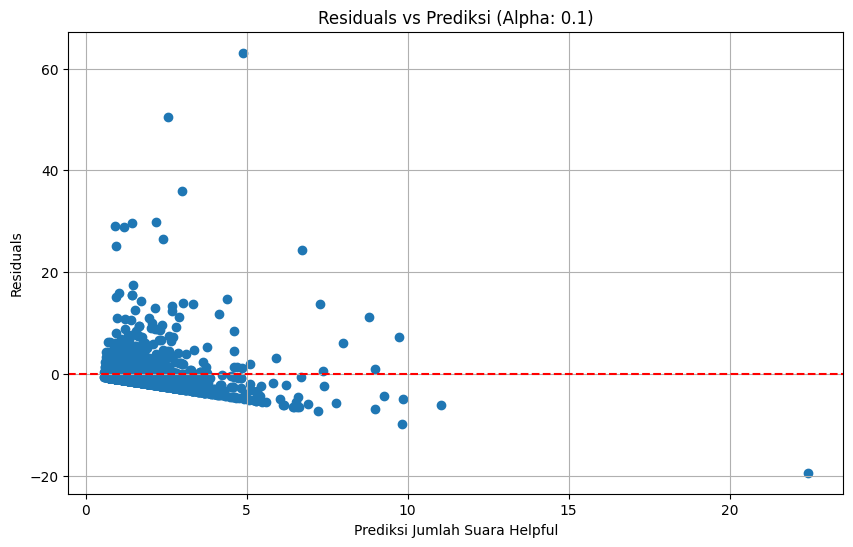

Alpha: 1, RMSE: 3.5726522065667012


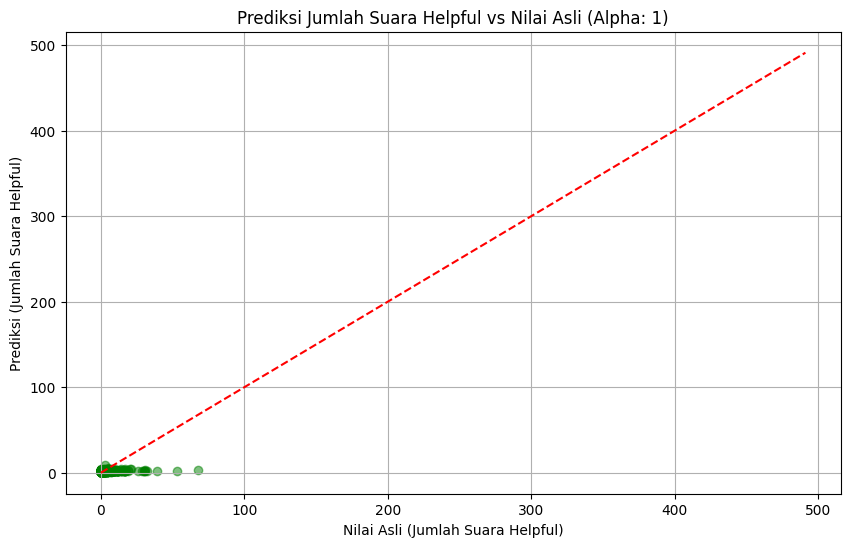

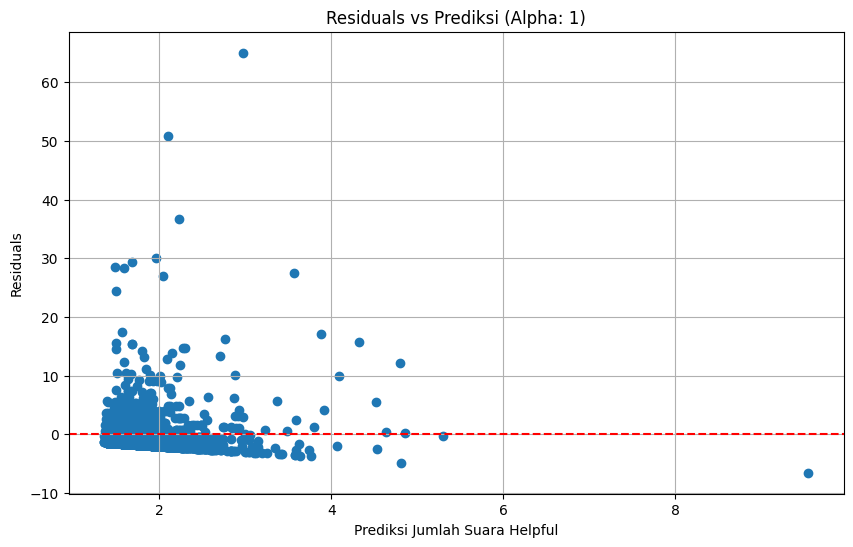

Alpha: 10, RMSE: 3.6359524392688365


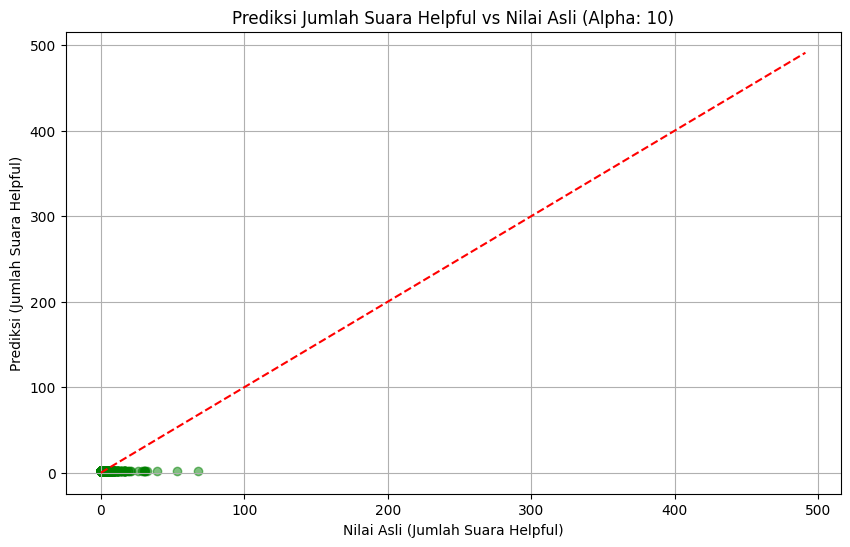

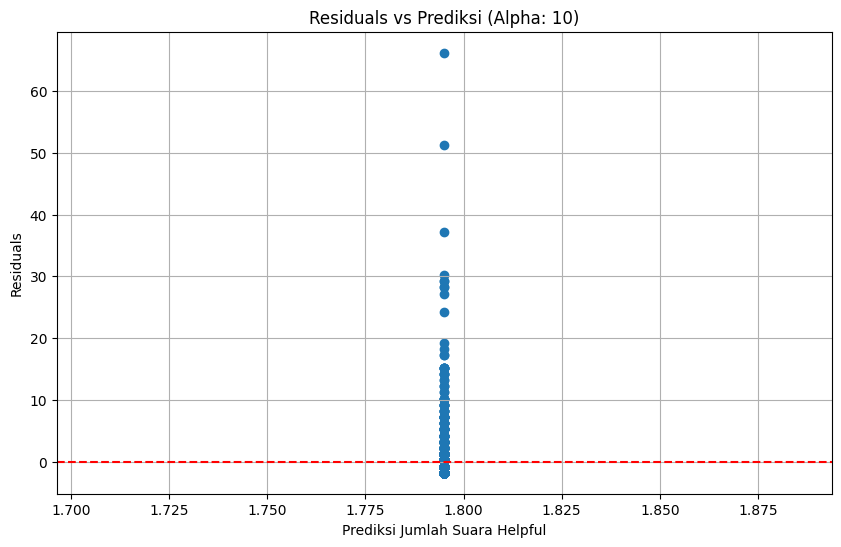

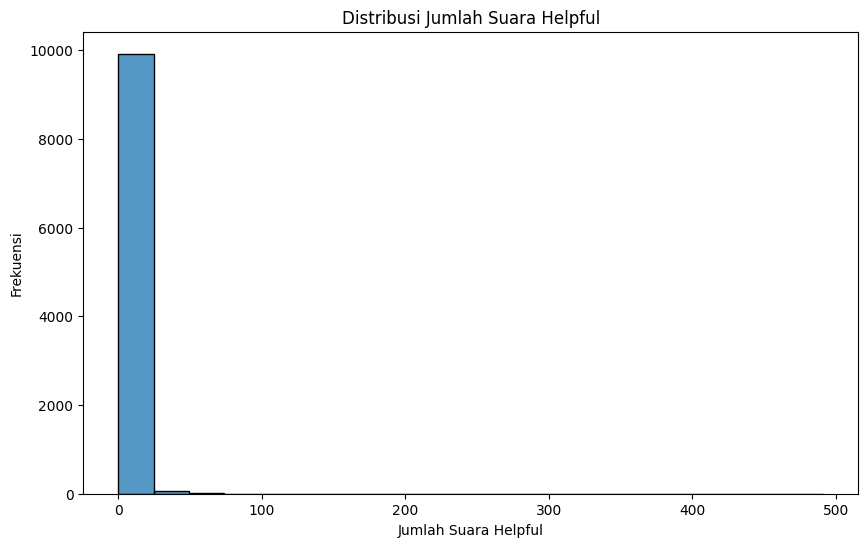

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Misalkan df adalah DataFrame yang sudah ada
# X_helpful dan y_helpful
X_helpful = df[['Score', 'reviewLength']]  # Fitur
y_helpful = df['HelpfulnessNumerator']  # Target (Jumlah Suara Helpful)

# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_helpful, y_helpful, test_size=0.2, random_state=42)

# Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Lasso Regression dengan berbagai nilai alpha
alphas = [0.01, 0.1, 1, 10]
for alpha_value in alphas:
    model_helpful = Lasso(alpha=alpha_value)
    model_helpful.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred_helpful = model_helpful.predict(X_test_scaled)

    # Evaluasi
    rmse_helpful = np.sqrt(mean_squared_error(y_test, y_pred_helpful))
    print(f'Alpha: {alpha_value}, RMSE: {rmse_helpful}')

    # Visualisasi Prediksi vs Nilai Asli
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_helpful, alpha=0.5, color='green')
    plt.title(f'Prediksi Jumlah Suara Helpful vs Nilai Asli (Alpha: {alpha_value})')
    plt.xlabel('Nilai Asli (Jumlah Suara Helpful)')
    plt.ylabel('Prediksi (Jumlah Suara Helpful)')
    plt.grid(True)

    # Menambahkan garis diagonal
    plt.plot([y_helpful.min(), y_helpful.max()], [y_helpful.min(), y_helpful.max()], color='red', linestyle='--')

    plt.show()

    # Visualisasi Residuals
    residuals = y_test - y_pred_helpful
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_helpful, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Prediksi (Alpha: {alpha_value})')
    plt.xlabel('Prediksi Jumlah Suara Helpful')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

# Pemeriksaan distribusi target
plt.figure(figsize=(10, 6))
sns.histplot(df['HelpfulnessNumerator'], bins=20)
plt.title('Distribusi Jumlah Suara Helpful')
plt.xlabel('Jumlah Suara Helpful')
plt.ylabel('Frekuensi')
plt.show()

In [43]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F

# Inisialisasi Spark Session
spark = SparkSession.builder.appName('AmazonFoodReviewLasso').getOrCreate()

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Menghitung panjang teks sebagai fitur
spark_df = spark_df.withColumn('reviewLength', F.length(spark_df['Text']))  # Use F.length for string length

# Pilih kolom untuk fitur dan target
assembler = VectorAssembler(inputCols=['HelpfulnessNumerator', 'reviewLength'], outputCol='features')
df_transformed = assembler.transform(spark_df)

# Menyiapkan Linear Regression dengan Lasso (ElasticNet dengan elasticNetParam = 1)
lr = LinearRegression(featuresCol='features', labelCol='Score', elasticNetParam=1.0, regParam=0.1)  # Lasso Regression

# Melatih model
lr_model = lr.fit(df_transformed)

# Menampilkan koefisien dan intercept
print(f'Koefisien: {lr_model.coefficients}')
print(f'Intercept: {lr_model.intercept}')

# Prediksi menggunakan model Lasso
predictions = lr_model.transform(df_transformed)

# Tampilkan beberapa prediksi
predictions.select('Score', 'prediction').show(5)


Koefisien: [0.0,-2.3862328128543342e-05]
Intercept: 4.204393997941631
+-----+------------------+
|Score|        prediction|
+-----+------------------+
|    5|4.2001226412066215|
|    3| 4.195541074205941|
|    5| 4.201339619941177|
|    5| 4.185137099141897|
|    4| 4.201100996659892|
+-----+------------------+
only showing top 5 rows



In [44]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F

# Inisialisasi Spark Session
spark = SparkSession.builder.appName('AmazonFoodReviewRegression').getOrCreate()

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Menghitung panjang teks sebagai fitur
spark_df = spark_df.withColumn('reviewLength', F.length(spark_df['Text'])) # Use F.length for string length

# Pilih kolom untuk fitur dan target
assembler = VectorAssembler(inputCols=['HelpfulnessNumerator', 'reviewLength'], outputCol='features')
df_transformed = assembler.transform(spark_df)

# Menampilkan kolom hasil transformasi
df_transformed.select('HelpfulnessNumerator', 'reviewLength', 'features').show(5)

+--------------------+------------+------------+
|HelpfulnessNumerator|reviewLength|    features|
+--------------------+------------+------------+
|                   0|         179| [0.0,179.0]|
|                   0|         371| [0.0,371.0]|
|                   0|         128| [0.0,128.0]|
|                  12|         807|[12.0,807.0]|
|                   0|         138| [0.0,138.0]|
+--------------------+------------+------------+
only showing top 5 rows



# Menggunakan Logistic Rgression dengan GridSearchCV dan Stratified K-Fold Cross Validation untuk memilih hyperparameter terbaik dan mengevalusai model

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Menyiapkan data (gunakan X dan y yang sudah ada, misalnya X = fitur, y = target)
# X = df[['HelpfulnessNumerator', 'reviewLength']]  # Fitur
# y = df['Score']  # Target (biner: 0 untuk negatif, 1 untuk positif)

# Pastikan kolom 'reviewLength' sudah ada di DataFrame
df['reviewLength'] = df['Text'].apply(lambda x: len(str(x))) # Menambahkan kolom 'reviewLength' jika belum ada

# Misalnya: target biner berdasarkan score >= 4 (positif) atau score < 4 (negatif)
y = (df['Score'] >= 4).astype(int)  # Membuat target biner
X = df[['HelpfulnessNumerator', 'reviewLength']]  # Fitur

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline untuk model dan preprocessing (misalnya scaling)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling fitur numerik
    ('logreg', LogisticRegression())  # Logistic Regression
])

# Menyiapkan parameter grid untuk tuning
param_grid = {
    'logreg__C': [0.1, 1, 10],  # Regularization strength
    'logreg__solver': ['liblinear', 'saga'],  # Algoritma optimasi
    'logreg__penalty': ['l2', 'l1']  # Jenis regularization
}

# Inisialisasi GridSearchCV dengan Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),  # 5-fold cross-validation
    scoring='accuracy',  # Gunakan akurasi untuk penilaian
    n_jobs=-1,  # Gunakan semua CPU yang tersedia
    verbose=1
)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Mengevaluasi model terbaik pada data uji
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Test Accuracy: 0.8025


# Mengevaluasi model dengan Cross Validation tanpa hyperparameter

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Misalnya, X dan y sudah disiapkan sebelumnya
# X = fitur
# y = target (binary: 0 untuk negatif, 1 untuk positif)

# Membuat pipeline untuk model dan preprocessing (misalnya scaling)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling fitur numerik
    ('logreg', LogisticRegression())  # Logistic Regression
])

# Menggunakan cross-validation untuk mengevaluasi model dengan 5-fold
accuracy_cv = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f"Cross-Validation Accuracy: {accuracy_cv.mean():.4f}")
print(f"Accuracy per Fold: {accuracy_cv}")


Cross-Validation Accuracy: 0.7822
Accuracy per Fold: [0.7825 0.784  0.7825 0.7795 0.7825]
